In [ ]:
import numpy as np
from math import *
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss
from time import time
from scipy.optimize import curve_fit
from google.colab import files
import io
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import optimize

#Files

In [ ]:
uploaded = files.upload()

Saving DATA_ES500.xlsx to DATA_ES500 (1).xlsx
Saving Forward_prices.xlsx to Forward_prices (1).xlsx
Saving IV.xlsx to IV (1).xlsx


In [ ]:
d = pd.read_excel(io.BytesIO(uploaded['DATA_ES500.xlsx']))
fwd = pd.read_excel(io.BytesIO(uploaded['Forward_prices.xlsx']))
IV = pd.read_excel(io.BytesIO(uploaded['IV.xlsx']))

In [ ]:
K = d['Strikes'].to_numpy()
forwards = fwd['Forwards'].to_numpy()
I = IV.to_numpy() #transform DataFrame to a matrix
Strike = K.tolist()



In [ ]:
start_date= '04/11/2019'
start_date = pd.to_datetime(start_date)
#Maturities
T = []



for i in range(18):
  end = pd.to_datetime(IV.columns.values[i])
  maturity = (end - start_date)
  T.append(float(maturity.days)/365)


#FROM IMPLIED VOLS TO PRICES (THROUGH BLACK SCHOLES)

In [ ]:
def d1(s0,k,r,sigma,T):
    return (np.log(s0/k)+(r+sigma**2/2)*T)/(sigma*np.sqrt(T))

def d2(s0,k,r,sigma,T):
     return (np.log(s0/k)+(r-sigma**2/2)*T)/(sigma*np.sqrt(T))
    
def BS(s0,k,r,sigma,T):
    return s0*ss.norm.cdf(d1(s0,k,r,sigma,T))-k*np.exp(-r*T)*ss.norm.cdf(d2(s0,k,r,sigma,T))

In [ ]:
prices = np.zeros((51,18))

for i in range(len(IV)):
  for j in range(len(forwards)):
    prices[i][j] = BS(forwards[j],K[i],0,I[i][j],T[j]) #Black model, r = 0

BS_price = pd.DataFrame(prices)


In [ ]:
BS_price

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,3280.323089,3248.689721,3246.211385,3243.251554,3243.307644,3232.310844,3220.343812,3133.584080,3111.135346,3017.119606,2997.753972,2893.563828,2798.996463,2714.701514,2639.490410,2572.653887,2513.841440,2460.602363
1,3180.323089,3148.689728,3146.211409,3143.251651,3143.308067,3132.320081,3120.361878,3033.598401,3011.186635,2917.248610,2897.962153,2794.051285,2699.892713,2615.976054,2541.325472,2475.035718,2416.779430,2364.365339
2,3080.323089,3048.689745,3046.211474,3043.251887,3043.309003,3032.335943,3020.392399,2933.625088,2911.274186,2817.456692,2798.286217,2694.769397,2601.162697,2517.740161,2443.807478,2378.203523,2320.633836,2269.225470
3,2980.323089,2948.689783,2946.211611,2943.252358,2943.310723,2932.360075,2920.438207,2833.668073,2811.406144,2717.757221,2698.741918,2595.738223,2502.826619,2420.011654,2346.948195,2282.161908,2225.401260,2175.165280
4,2880.323090,2848.689855,2846.211866,2843.253194,2843.313591,2832.394508,2820.502780,2733.732165,2711.592330,2618.166545,2599.349034,2496.985436,2404.917232,2322.825357,2250.782667,2186.944641,2131.113208,2082.210358
5,2780.323091,2748.689984,2746.212307,2743.254581,2743.318087,2732.441701,2720.590296,2633.823215,2611.844366,2518.703867,2500.130828,2398.544191,2307.475178,2226.226071,2155.358673,2092.600772,2037.818905,1990.407304
6,2680.323093,2648.690201,2646.213033,2643.256774,2643.324844,2632.504627,2620.705748,2533.948332,2512.175946,2419.391500,2401.114187,2300.452776,2210.547774,2130.266565,2060.733471,1999.190186,1945.579683,1899.816331
7,2580.323098,2548.690551,2546.214184,2543.260124,2543.334698,2532.586878,2520.855106,2434.116153,2412.603191,2320.255294,2302.330004,2202.754805,2114.188827,2035.007025,1966.972654,1906.781891,1854.466683,1810.508097
8,2480.323106,2448.691103,2446.215957,2443.265110,2443.348743,2432.692802,2421.045512,2334.337177,2313.145087,2221.325172,2203.813710,2105.499679,2018.458880,1940.515100,1874.149835,1815.453355,1764.559850,1722.562131
9,2380.323119,2348.691954,2346.218631,2343.272388,2343.368414,2332.827669,2321.285528,2234.624171,2213.824015,2122.635790,2105.605922,2008.743214,1923.425698,1846.866251,1782.346731,1725.290336,1675.947492,1636.065986


# SVI CALIBRATION & MONTE CARLO


In [ ]:
def SVI_calibration(k,a,b,rho,m,sigma):
  SVI = a+b*(rho*(k-m)+np.sqrt((k-m)**2+sigma**2))
  return SVI

In [ ]:
log_strikes = np.log(K)
parameters = np.zeros((5,len(T)))

for i in range(0,len(T)):
  implied_var = (IV.iloc[:,i])**2

  popt,pcov = curve_fit(SVI_calibration,log_strikes,implied_var,p0=(-0.1949410760452949, 0.3340214781169242, -0.013807059032125367, 8.213418579710023, 0.6324108554863928),maxfev = 10000000)

  parameters[:,i] = np.transpose(popt)

a_cal = parameters[0,:]
b_cal = parameters[1,:]
rho_cal = parameters[2,:]
m_cal = parameters[3,:]
sigma_cal = parameters[4,:]

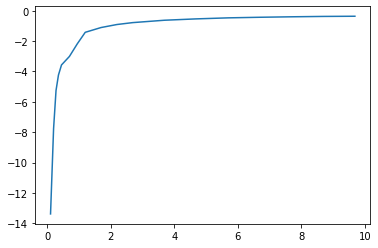

In [ ]:
plt.plot(T,a_cal)

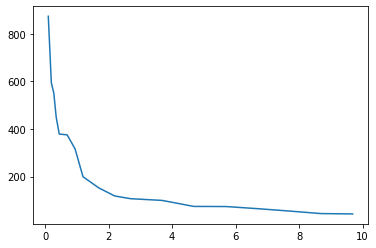

In [ ]:
plt.plot(T,b_cal)

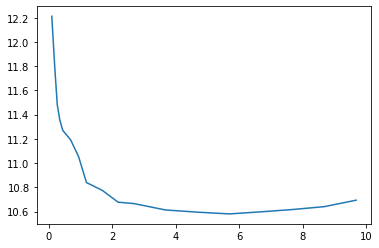

In [ ]:
plt.plot(T,m_cal)

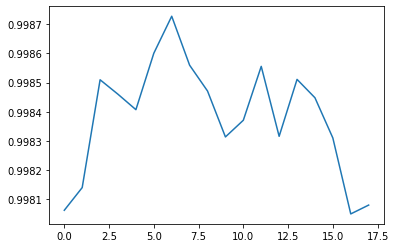

In [ ]:
plt.plot(rho_cal)

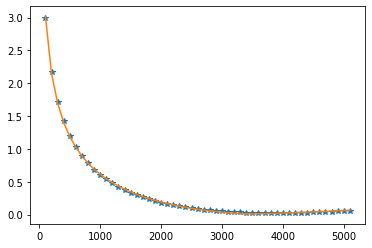

In [ ]:
plt.plot(K, SVI_calibration(np.log(K),a_cal[0],b_cal[0],rho_cal[0],m_cal[0],sigma_cal[0]),'*')
plt.plot(K,IV.iloc[:,0]**2)

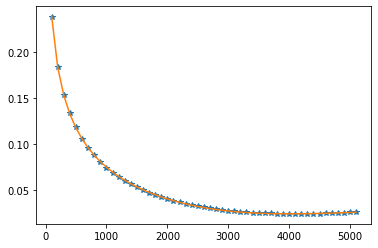

In [ ]:
plt.plot(K, SVI_calibration(np.log(K),a_cal[15],b_cal[15],rho_cal[15],m_cal[15],sigma_cal[15]),'*')
plt.plot(K,IV.iloc[:,15]**2)

In [ ]:
def p_std_MC(S0,K,n,m,t,num):
    brownian=np.zeros([n,m+1])
    time=np.zeros(m+1)
    S=np.zeros([n,m+1])
    z=np.random.normal(0,1,(n,m+1))
    payoff=np.zeros(n)
    int_dw = np.zeros([n,m+1])
    iv=np.zeros([n,m+1])
    int_du = np.zeros([n,m+1])
    y = np.zeros([n,m+1])
    didt = np.zeros([n,m+1])
    didy=np.zeros([n,m+1])
    didy2=np.zeros([n,m+1])
    local_var = np.zeros([n,m+1])
    local_vol = np.zeros([n,m+1])

    for i in range(0,n):
        S[i,0]=S0
        brownian[i,0]=0
        iv[i][0]=SVI_calibration(np.log(S[i][0]),a_cal[num],b_cal[num],rho_cal[num],m_cal[num],sigma_cal[num])
        for j in range(0,m):
          iv[i][j] =(SVI_calibration(np.log(S[i][j]),a_cal[num],b_cal[num],rho_cal[num],m_cal[num],sigma_cal[num]))**.5
          y[i][j] = np.log(K/S[i][j])
          didt[i][j] = ((SVI_calibration(np.log(S[i][j]),a_cal[num+1],b_cal[num+1],rho_cal[num+1],m_cal[num+1],sigma_cal[num+1]))**0.5-iv[i][j]) / (T[num+1]-T[num])
          didy[i][j] = ((SVI_calibration(np.log(S[i][j]+1),a_cal[num+1],b_cal[num+1],rho_cal[num+1],m_cal[num+1],sigma_cal[num+1]))**0.5-iv[i][j]) /(np.log(K/(S[i][j]+1))-np.log(K/S[i][j]))
          didy2[i][j] = ((SVI_calibration(np.log(S[i][j]+1),a_cal[num+1],b_cal[num+1],rho_cal[num+1],m_cal[num+1],sigma_cal[num+1]))**0.5-(SVI_calibration(np.log(S[i][j]-1),a_cal[num+1],b_cal[num+1],rho_cal[num+1],m_cal[num+1],sigma_cal[num+1]))**0.5 + 2*iv[i][j])/(np.log(K/(S[i][j]+1))-np.log(K/S[i][j]))**2 

          local_var[i][j] =((2*iv[i][j]*didt[i][j]*t)+iv[i][j]**2)/(1-(2*didy[i][j]*(y[i][j]/iv[i][j]))+(2*didy[i][j]*(iv[i][j]**2)*(t**2))*((-1/8)-(1/(2*(iv[i][j]**2)*t))+((y[i][j]**2)/(2*(iv[i][j]**4)*(t**2))))+(didy[i][j]**2)*t+(t*iv[i][j]*didy2[i][j]))
            
          if local_var[i][j] >=0:
            local_vol[i][j] = (local_var[i][j])**.5
    
          else:
            local_vol[i][j] = (-(local_var[i][j]))**.5
          
          time[j+1]=time[j]+t/m
          brownian[i][j+1]=brownian[i,j]+z[i,j]*np.sqrt(t/m)
        
          int_dw[i][0]=(local_vol[i][0])*brownian[i][0]
          int_dw[i][j+1]=int_dw[i][j]+local_vol[i][j]*(brownian[i][j+1]-brownian[i][j])
            
          int_du[i,0] = (local_vol[i][0]**2)*t/m
          int_du[i][j+1]= int_du[i][j] + (local_vol[i][j]**2)*t/m

          S[i][j+1]=S[i][0]*(np.exp((-0.5*int_du[i][j]))+int_dw[i][j]**0.5)
           
        payoff[i]=np.maximum(S[i,m]-K,0)
    return(local_var,np.mean(payoff))

In [ ]:
p_std_MC(forwards[12],K[35],1000,100,T[12],12) #esto sirve para comprobar y mirar la tabla de precios BS con implied, no da bien

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


(array([[9.62383092e-09, 9.62383092e-09,            nan, ...,
                    nan,            nan, 0.00000000e+00],
        [9.62383092e-09, 9.62383092e-09,            nan, ...,
                    nan,            nan, 0.00000000e+00],
        [9.62383092e-09, 9.62383092e-09,            nan, ...,
                    nan,            nan, 0.00000000e+00],
        ...,
        [9.62383092e-09, 9.62383092e-09,            nan, ...,
                    nan,            nan, 0.00000000e+00],
        [9.62383092e-09, 9.62383092e-09, 9.56121231e-09, ...,
                    nan,            nan, 0.00000000e+00],
        [9.62383092e-09, 9.62383092e-09, 9.56229834e-09, ...,
                    nan,            nan, 0.00000000e+00]]), nan)

In [ ]:
Prices #prices using the monte carlo, do not run again because it's very slow

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,3280.321450,3248.684623,3246.212659,3243.253174,3243.312263,3232.315297,3220.348549,3133.563440,3111.119082,3017.053715,2997.661839,2893.314268,2798.490532,2713.963521,2638.364770,2571.219948,2512.134872,0.0
1,3180.322342,3148.689246,3146.203118,3143.243857,3143.309605,3132.315868,3120.329424,3033.564279,3011.141994,2917.110797,2897.665056,2793.275961,2698.471486,2614.064539,2538.358385,2471.138848,2411.864903,0.0
2,3080.323833,3048.686412,3046.207093,3043.248120,3043.309578,3032.288642,3020.324521,2933.578146,2911.085240,2817.083486,2797.650125,2693.294654,2598.515066,2514.038429,2438.390571,2371.145175,2311.900568,0.0
3,2980.322008,2948.689847,2946.201193,2943.266177,2943.300635,2932.282359,2920.318025,2833.578474,2811.120338,2717.024989,2697.697936,2593.292479,2498.477029,2413.923283,2338.380180,2271.141113,2212.091287,0.0
4,2880.324010,2848.684989,2846.208649,2843.256615,2843.303754,2832.299000,2820.356833,2733.605401,2711.097444,2617.060374,2597.670933,2493.334501,2398.588193,2313.959989,2238.307925,2171.120265,2112.024238,0.0
5,2780.324273,2748.688721,2746.208590,2743.256562,2743.308443,2732.315714,2720.347828,2633.590590,2611.121067,2517.061563,2497.636722,2393.346938,2298.524019,2214.035962,2138.388458,2071.251526,2011.874258,0.0
6,2680.321470,2648.683127,2646.223033,2643.267647,2643.310725,2632.312344,2620.355347,2533.568511,2511.114805,2417.087032,2397.646346,2293.304570,2198.497149,2113.963007,2038.345269,1971.065024,1911.969828,0.0
7,2580.321503,2548.688342,2546.216010,2543.244286,2543.309064,2532.302829,2520.348808,2433.564158,2411.101667,2317.086868,2297.640815,2193.286533,2098.503803,2014.011760,1938.400167,1871.161219,1812.003449,0.0
8,2480.325029,2448.694339,2446.224799,2443.251646,2443.313927,2432.318284,2420.318991,2333.564945,2311.105756,2217.075547,2197.664821,2093.298256,1998.493405,1913.915451,1838.373404,1771.246355,1712.010059,0.0
9,2380.323087,2348.685438,2346.189882,2343.246327,2343.310851,2332.320473,2320.352651,2233.581060,2211.110743,2117.067242,2097.636075,1993.308675,1898.419498,1813.921554,1738.418187,1671.147219,1612.026623,0.0


#Surface local from SVI

In [ ]:
F  = forwards.tolist() *51

y = np.zeros((51,18))

for i in range(51):
  y[i] = np.log(K[i]/forwards)

In [ ]:
I = np.zeros((51,18))

for i in range(18):
  for j in range(51):
    I[j][i] = (SVI_calibration(np.log(K[j]),a_cal[i],b_cal[i],rho_cal[i],m_cal[i],sigma_cal[i]))**.5 

I = pd.DataFrame(I)


In [ ]:
Local_var = np.zeros((50,17))

Local_vol = np.zeros((50,17))

didt = np.zeros((50,17)) 
didy = np.zeros((50,17))
didy2 = np.zeros((50,17)) 

for i in range(1,len(IV)-1):
  for j in range(17):
    didt[i][j] = (I[i][j+1] - I[i][j]) / (T[j+1] - T[j])
    didy[i][j] = (I[i+1][j] - I[i][j]) / (y[i+1][j]-y[i][j]) 
    didy2[i][j] = (I[i+1][j]-I[i-1][j] + 2*I[i][j])/ (y[i+1][j]-y[i][j])**2 
    
    Local_var[i][j] = ((2*T[j]*I[i][j]*didt[i][j] + I[i][j]**2)/((1-2*didy[i][j]*y[i][j]/I[i][j] + 2*(T[j]*I[i][j]*didy[i][j])**2*(-1/8-1/(2*T[j]*I[i][j]**2)+y[i][j]**2) + T[j]*I[i][j]*didy2[i][j] + 2*T[j]*didy[i][j]**2)))

    if Local_var[i][j] >=0:
      Local_vol[i][j] = (Local_var[i][j])**.5

      if Local_vol[i][j] > 5:
        Local_vol[i][j] = (Local_vol[i+1][j] + Local_vol[i-1][j])/2

    else:
      Local_vol[i][j] = (Local_vol[i][j+1] + Local_vol[i][j-1])/2

    


Local2 = pd.DataFrame(Local_vol)

In [ ]:
Local2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.792776,0.859351,0.759829,0.698542,0.694969,0.374837,0.187418,0.340910,0.275234,0.215585,0.211030,0.177578,0.137223,0.139472,0.119881,0.108966,0.120743
2,1.420942,0.711519,0.630475,0.581177,0.579099,0.320088,0.033425,0.289209,0.234555,0.184516,0.180837,0.153006,0.118102,0.120962,0.104010,0.094672,0.105763
3,1.218298,0.623996,0.552649,0.509520,0.507270,0.285026,0.054567,0.256185,0.208193,0.164221,0.160991,0.136707,0.105318,0.108550,0.093323,0.085020,0.095599
4,1.086617,0.564532,0.499244,0.459906,0.457074,0.260147,0.063517,0.232749,0.189336,0.149652,0.146697,0.124926,0.096040,0.099547,0.085559,0.078003,0.088198
5,0.992952,0.520968,0.459804,0.423014,0.419484,0.241392,0.068619,0.215049,0.175022,0.138575,0.135807,0.115943,0.088947,0.092679,0.079635,0.072652,0.082550
6,0.922451,0.487446,0.429229,0.394246,0.389992,0.226655,0.071968,0.201097,0.163702,0.129809,0.127181,0.108830,0.083323,0.087252,0.074955,0.068429,0.078092
7,0.867265,0.460733,0.404684,0.371024,0.366052,0.214720,0.074391,0.189752,0.154477,0.122666,0.120148,0.103042,0.078741,0.082847,0.071161,0.065009,0.074481
8,0.822784,0.438872,0.384442,0.351771,0.346096,0.204829,0.076284,0.180300,0.146784,0.116711,0.114285,0.098228,0.074929,0.079199,0.068022,0.062185,0.071497
9,0.786075,0.420591,0.367378,0.335459,0.329102,0.196476,0.077857,0.172273,0.140249,0.111656,0.109311,0.094157,0.071706,0.076129,0.065384,0.059816,0.068990


In [ ]:
df = Local2.iloc[1:,:]
df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
1,1.792776,0.859351,0.759829,0.698542,0.694969,0.374837,0.000000,0.340910,0.275234,0.215585,0.211030,0.177578,0.137223,0.139472,0.119881,0.108966,0.120743
2,1.420942,0.711519,0.630475,0.581177,0.579099,0.320088,0.033425,0.289209,0.234555,0.184516,0.180837,0.153006,0.118102,0.120962,0.104010,0.094672,0.105763
3,1.218298,0.623996,0.552649,0.509520,0.507270,0.285026,0.054567,0.256185,0.208193,0.164221,0.160991,0.136707,0.105318,0.108550,0.093323,0.085020,0.095599
4,1.086617,0.564532,0.499244,0.459906,0.457074,0.260147,0.063517,0.232749,0.189336,0.149652,0.146697,0.124926,0.096040,0.099547,0.085559,0.078003,0.088198
5,0.992952,0.520968,0.459804,0.423014,0.419484,0.241392,0.068619,0.215049,0.175022,0.138575,0.135807,0.115943,0.088947,0.092679,0.079635,0.072652,0.082550


[Text(0, 0.5, ' Local volatility'),
 Text(0, 0.5, ' Local volatility'),
 Text(0, 0.5, ' Local volatility')]

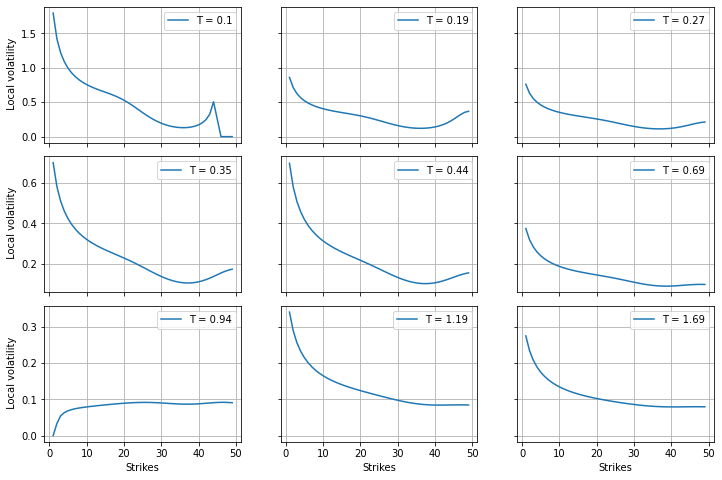

In [ ]:
fig,ax= plt.subplots(nrows=3,ncols=3,figsize=(12,8),gridspec_kw={'wspace':0.2,'hspace':0.1},sharex='col',sharey='row')


ax[0,0].plot(df[0],label = 'T = 0.1')
ax[0,0].grid()  
ax[0,0].legend(loc='best')

ax[0,1].plot(df[1],label = 'T = 0.19')
ax[0,1].grid()  
ax[0,1].legend(loc='best')

ax[0,2].plot(df[2],label = 'T = 0.27')
ax[0,2].grid()  
ax[0,2].legend(loc='best')

ax[1,0].plot(df[3],label = 'T = 0.35')
ax[1,0].grid()  
ax[1,0].legend(loc='best')

ax[1,1].plot(df[4],label = 'T = 0.44')
ax[1,1].grid()  
ax[1,1].legend(loc='best')

ax[1,2].plot(df[5],label = 'T = 0.69' )
ax[1,2].grid()  
ax[1,2].legend(loc='best')

ax[2,0].plot(df[6],label = 'T = 0.94')
ax[2,0].grid()  
ax[2,0].legend(loc='best')

ax[2,1].plot(df[7],label = 'T = 1.19')
ax[2,1].grid()  
ax[2,1].legend(loc='best')

ax[2,2].plot(df[8],label = 'T = 1.69')
ax[2,2].grid()  
ax[2,2].legend(loc='best')

plt.setp(ax[-1, :], xlabel='Strikes')
plt.setp(ax[:, 0], ylabel=' Local volatility')

[Text(0, 0.5, ' Local volatility'),
 Text(0, 0.5, ' Local volatility'),
 Text(0, 0.5, ' Local volatility')]

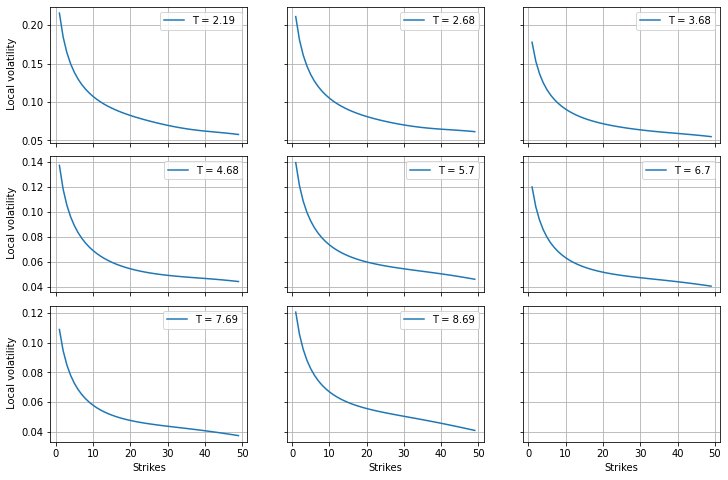

In [ ]:
fig,ax= plt.subplots(nrows=3,ncols=3,figsize=(12,8),gridspec_kw={'wspace':0.2,'hspace':0.1},sharex='col',sharey='row')


ax[0,0].plot(df[9],label = 'T = 2.19 ')
ax[0,0].grid()  
ax[0,0].legend(loc='best')

ax[0,1].plot(df[10],label = 'T = 2.68')
ax[0,1].grid()  
ax[0,1].legend(loc='best')

ax[0,2].plot(df[11],label = 'T = 3.68')
ax[0,2].grid()  
ax[0,2].legend(loc='best')

ax[1,0].plot(df[12],label = 'T = 4.68')
ax[1,0].grid()  
ax[1,0].legend(loc='best')

ax[1,1].plot(df[13],label = 'T = 5.7')
ax[1,1].grid()  
ax[1,1].legend(loc='best')

ax[1,2].plot(df[14],label = 'T = 6.7')
ax[1,2].grid()  
ax[1,2].legend(loc='best')

ax[2,0].plot(df[15],label = 'T = 7.69')
ax[2,0].grid()  
ax[2,0].legend(loc='best')

ax[2,1].plot(df[16],label = 'T = 8.69')
ax[2,1].grid()  
ax[2,1].legend(loc='best')

ax[2,2].grid()

plt.setp(ax[-1, :], xlabel='Strikes')
plt.setp(ax[:, 0], ylabel=' Local volatility')

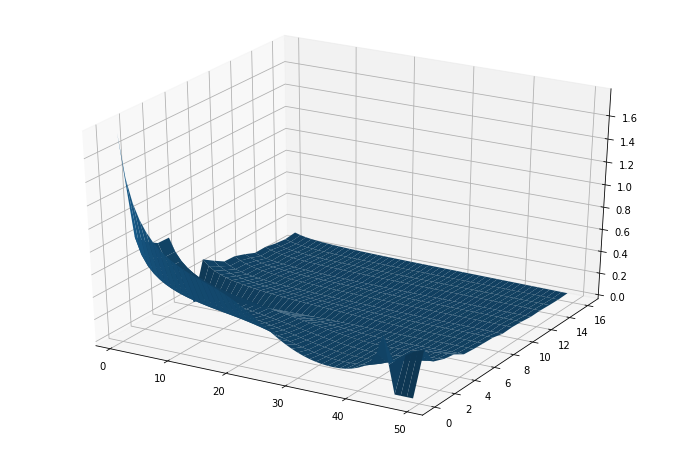

In [ ]:
x = df.columns
y = df.index
X,Y = np.meshgrid(x,y)
Z = df
fig = plt.figure()
fig.set_size_inches(12, 8)
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(Y,X,Z)

#From local to prices (SVI)

In [ ]:
IV_brent = np.zeros((49,17))

for i in range(49):
  for j in range(17):
    IV_brent[i][j] = ImpliedBrent(forwards[j],T[j],K[i],Prices[j][i])

IV_BRENT = pd.DataFrame(IV_brent)

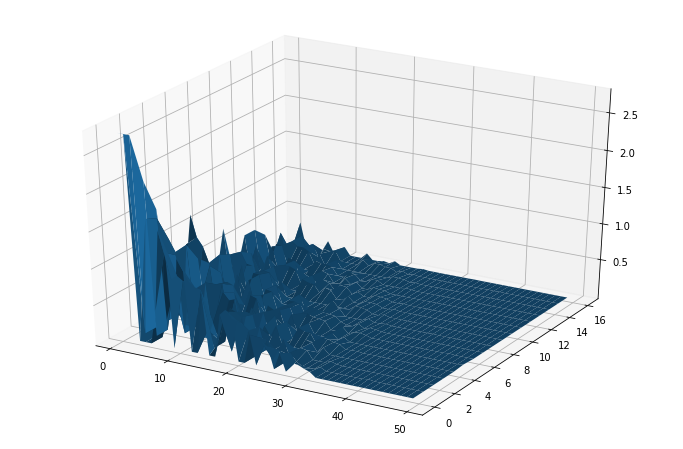

In [ ]:
x = df.columns
y = df.index
X,Y = np.meshgrid(x,y)
Z = IV_BRENT
fig = plt.figure()
fig.set_size_inches(12, 8)
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(Y,X,Z)

In [ ]:
IV_fmin = np.zeros((49,17))

for i in range(49):
  for j in range(17):
    IV_brent[i][j] = Impliedfminbound(forwards[j],T[j],K[i],Prices[j][i])

IV_FMIN = pd.DataFrame(IV_brent)

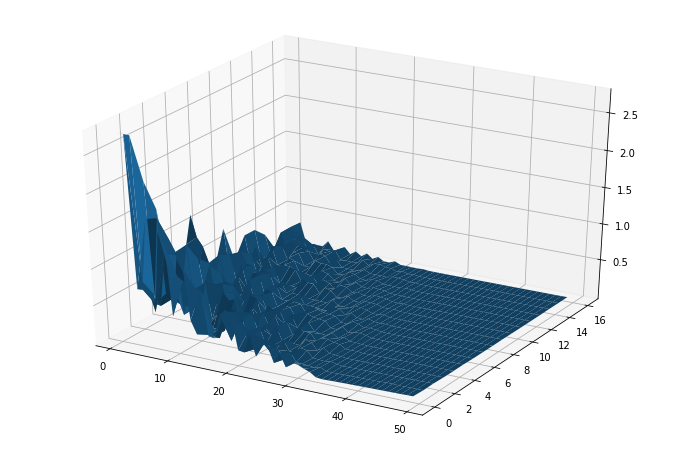

In [ ]:
x = df.columns
y = df.index
X,Y = np.meshgrid(x,y)
Z = IV_BRENT
fig = plt.figure()
fig.set_size_inches(12, 8)
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(Y,X,Z)

# From prices to implied vol via numerical methods

In [ ]:
def ImpliedBrent(F0,T,K,optionprice):
    def error(a):
      return(BS(F0, K, 0, a, T)-optionprice)**2 
    return optimize.brent(error, brack=(0.001,5)) 

In [ ]:
IV_brent = np.zeros((49,17))

for i in range(49):
  for j in range(17):
    IV_brent[i][j] = ImpliedBrent(forwards[j],T[j],K[i],BS_local[j][i])

IV_BRENT = pd.DataFrame(IV_brent)

In [ ]:
IV_BRENT

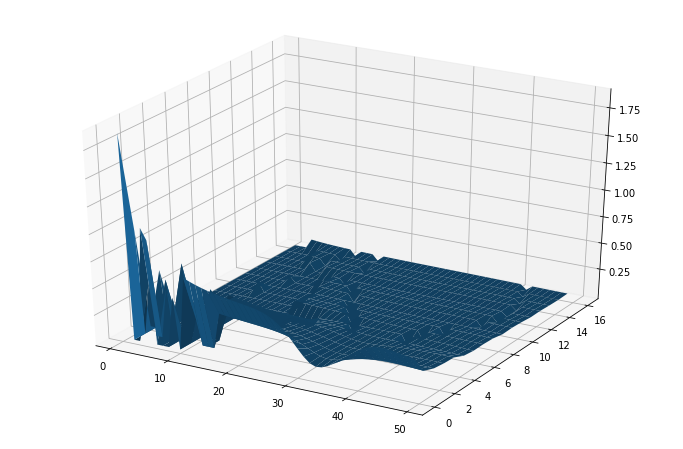

In [ ]:
x = df.columns
y = df.index
X,Y = np.meshgrid(x,y)
Z = IV_BRENT
fig = plt.figure()
fig.set_size_inches(12, 8)
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(Y,X,Z)

In [ ]:
def Impliedfminbound(F0,T,K,optionprice):
    def error(a):
      return(BS(F0, K, 0, a, T)-optionprice)**2 
    return optimize.fminbound(error, 0.001,5)

In [ ]:
IV_fmin = np.zeros((49,17))

for i in range(49):
  for j in range(17):
    IV_brent[i][j] = Impliedfminbound(forwards[j],T[j],K[i],BS_local[j][i])

IV_FMIN = pd.DataFrame(IV_brent)

In [ ]:
IV_FMIN

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.880237,0.727268,0.730062,0.725829,0.444530,0.443583,0.442650,0.277642,0.269393,0.208756,0.270611,0.164729,0.154896,0.164677,0.166525,0.106302,0.103163
1,1.438277,0.728461,0.720713,0.447464,0.581982,0.437795,0.271283,0.278876,0.171853,0.170665,0.162973,0.157196,0.153036,0.104522,0.101077,0.105594,0.062145
2,1.210381,0.446655,0.445866,0.441939,0.506963,0.272899,0.278111,0.254243,0.221481,0.161608,0.166040,0.104509,0.103549,0.106661,0.101602,0.094478,0.072500
3,1.066025,0.448032,0.441898,0.444427,0.454645,0.261843,0.261526,0.209388,0.163614,0.165986,0.157897,0.119367,0.106235,0.105486,0.001006,0.069734,0.088570
4,0.964761,0.445754,0.471011,0.270782,0.273156,0.272563,0.250747,0.149059,0.170170,0.161635,0.127568,0.099261,0.102369,0.001006,0.076335,0.074478,0.082844
5,0.889161,0.503660,0.273599,0.275160,0.385446,0.259535,0.206453,0.129969,0.162791,0.143711,0.100063,0.104696,0.094733,0.080741,0.054816,0.066130,0.078253
6,0.830302,0.452860,0.266631,0.364496,0.360949,0.150853,0.168208,0.175857,0.150066,0.124091,0.107033,0.103057,0.089264,0.065395,0.052168,0.064559,0.074517
7,0.783078,0.441144,0.272626,0.344768,0.340635,0.230443,0.132162,0.178688,0.145906,0.101040,0.113901,0.097971,0.075316,0.050375,0.068032,0.061913,0.071420
8,0.744350,0.266223,0.357668,0.328226,0.323442,0.197309,0.131683,0.170681,0.139439,0.077514,0.108893,0.093893,0.071697,0.075974,0.065287,0.059730,0.068811
9,0.712060,0.391044,0.342816,0.313998,0.308636,0.182463,0.099886,0.163672,0.133700,0.106639,0.104530,0.090313,0.068819,0.073257,0.062949,0.057627,0.066593


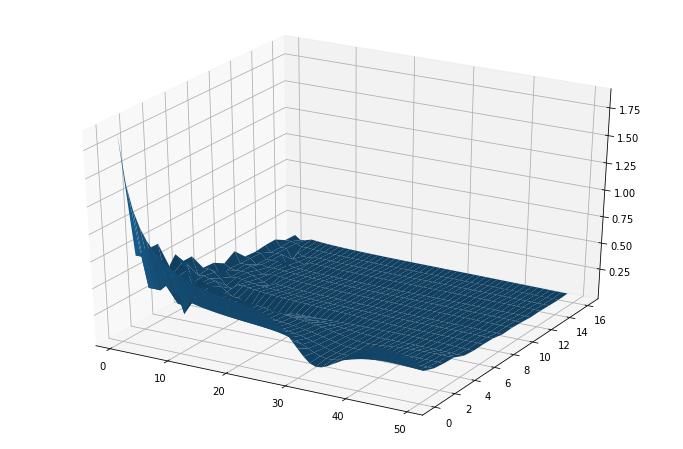

In [ ]:
x = df.columns
y = df.index
X,Y = np.meshgrid(x,y)
Z = IV_BRENT
fig = plt.figure()
fig.set_size_inches(12, 8)
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(Y,X,Z)